In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['diamonds.csv']


In [89]:
#reading the csv using pandas
#in R 'diamonds.csv' is part of the ggplot2 library you would have to import the library and then access the 
#datasets that comes with the library using data()
df = pd.read_csv('../input/diamonds.csv')

In [90]:
#initial look at the dataset
#in R you would need to insert the name of the dataset as the first argument of the head() function
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [119]:
# In R you would insert the name of the dataset as the first argument of the str() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
carat          53940 non-null float64
cut            53940 non-null object
color          53940 non-null object
clarity        53940 non-null object
depth          53940 non-null float64
table          53940 non-null float64
price          53940 non-null int64
x              53940 non-null float64
y              53940 non-null float64
z              53940 non-null float64
volume         53940 non-null float64
pricepcarat    53940 non-null float64
dtypes: float64(8), int64(1), object(3)
memory usage: 4.9+ MB


In [91]:
#shape of our dataset
# in R you would insert the name of the dataset as the first argument of the dim() function 
df.shape

(53940, 11)

From initial observation of the first 5 rows of our dataset we see that we do not need the first column. In R the first column is Carat. one difference between R and Python is that python uses zero based indexing where the initial element of a sequence is assinged the index zero. 

(Think of the first unnamed column as the way that indexing works in R)

In [92]:
#removing the first column of the dataset using iloc
#note that you do not need to do this for the diamonds dataset in R.
#An easy way to do this in R is to set the column to null
#diamomnds[1] <- NULL
df = df.iloc[:,1:]

In [93]:
#in R a way to check if there are na values in the columns of our dataset is using this function 
#apply(diamonds, 2, function(x) any(is.na(x)))
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

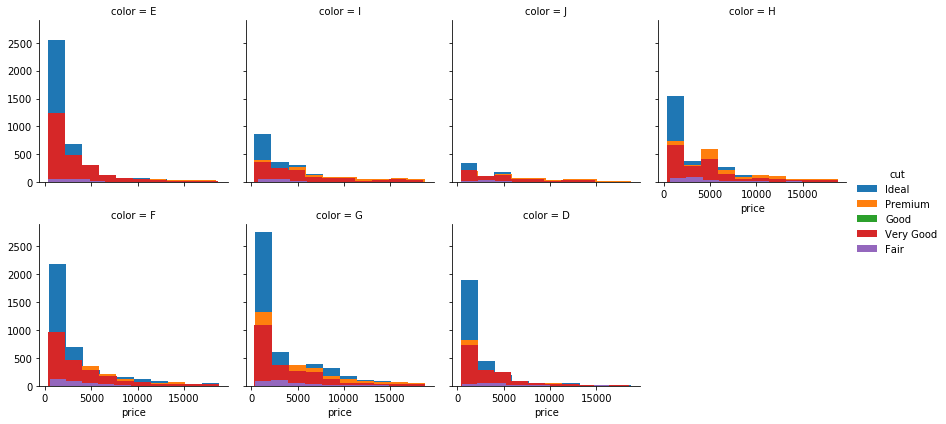

In [94]:
#explore the dataset by seeing how cut and color of a diamond affect the price
# histogram of price counts faceted by color and the cut of the diamond is used to color the histogram bars.
p1 = sns.FacetGrid(data = df, col ='color', col_wrap = 4, hue = 'cut')
(p1.map(plt.hist, 'price')).add_legend()

#to do this in R
#ggplot(aes(x = price), data = diamonds)+
#  geom_histogram(aes(fill = cut))+
#  facet_wrap(diamonds$color)
#I think it is more visually appealing and easier to read the output in R

(50, 80)

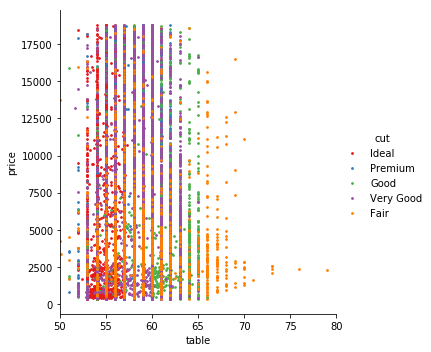

In [133]:
# A scatterplot of table vs. price
sns.lmplot(x='table', y='price', data=df, palette = 'Set1',
           fit_reg=False, # No regression line
           hue='cut', #color of the markers by cut
           scatter_kws={"s": 3, 'alpha':1}) #size of the markers and the alpha

plt.xlim(50,80) #setting the min and max limit for the x axis

#ggplot(aes(x=table, y= price), data = diamonds)+
#  geom_point(aes(color = cut))+
#  scale_x_continuous(breaks = seq(50,80,2), limit = c(50,80))

(0, 354.4266119)

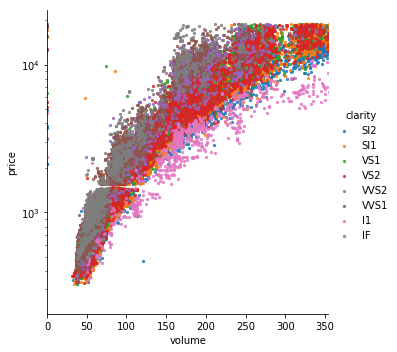

In [96]:
#let us now use the x,y and z to calculate the volume of the diamonds
# in R to create the new volume column you could
#diamonds$volume <- diamonds$x * diamonds$y * diamonds$z
df['volume'] = df.x * df.y *df.z

#create a scatterplot of the price vs volume to see how the volume affects the price
p3 = sns.lmplot(data = df, x = 'volume', y = 'price', fit_reg = False, hue = 'clarity', scatter_kws = {'s':5})
p3.set(yscale="log")
plt.xlim(0,df.volume.quantile(0.99))

#To recreate this in R:
#ggplot(aes(x = volume, y = price), data = diamonds)+
#  geom_point(aes(color = cut))+
#  scale_y_log10()+
#  xlim(0,quantile(diamonds$volume,0.99))

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


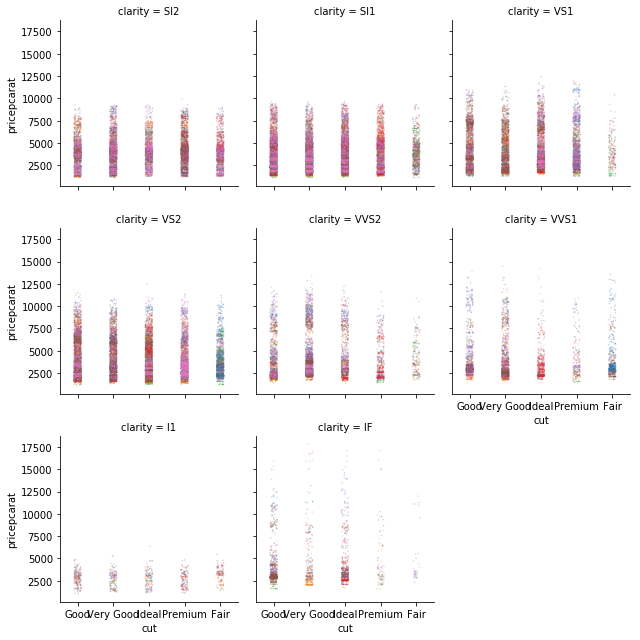

In [132]:
df['pricepcarat'] = df.price/df.carat
p4 = sns.FacetGrid(col = 'clarity', data = df, hue = 'color', col_wrap = 3)
p4.map(sns.stripplot,'cut','pricepcarat',alpha = 0.3, size = 1.5)
#ggplot(aes(x = cut, y = price/carat), data = diamonds)+
#  geom_point(aes(color = color), position = 'jitter', size = 0.5)+
#  facet_wrap(diamonds$clarity)+
#  scale_color_brewer(type = 'div')